# SO/BB Trend Over Time

## Table of Contents:

- [Imports](#imports)
- [Data](#data)
- [EDA/Analysis](#eda_analysis)

### Imports: <a class = "anchor" id = "imports"></a>

In [33]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
plt.style.use("ggplot")

### Data: <a class = "anchor" id = "data"></a>

In [34]:
path = "../lahman_db/baseballdatabank-master/core/Pitching.csv"

pitching_df = pd.read_csv(path)

player_ID = pitching_df["playerID"].unique()

SO = pitching_df.groupby("playerID")["SO"].sum()

BB = pitching_df.groupby("playerID")["BB"].sum()

IP_outs = pitching_df.groupby("playerID")["IPouts"].sum()

mid_year = pitching_df.groupby("playerID")["yearID"].median()

career_pitching = pd.DataFrame(zip(player_ID, SO, BB, IP_outs, mid_year),
                              columns = ["playerID", "SO", "BB", "IPouts", "midYear"])

career_pitching["SO/BB"] = career_pitching["SO"] / career_pitching["BB"]

career_pitching.head()

,playerID,SO,BB,IPouts,midYear,SO/BB
0,bechtge01,340,183,1011,2009.0,1.857923
1,brainas01,641,457,3328,1984.0,1.402626
2,fergubo01,280,116,992,2014.5,2.413793
3,fishech01,161,192,1704,1894.5,0.838542
4,fleetfr01,0,0,6,1896.0,NaN


### EDA/Analysis: <a class = "anchor" id = "eda_analysis"></a>

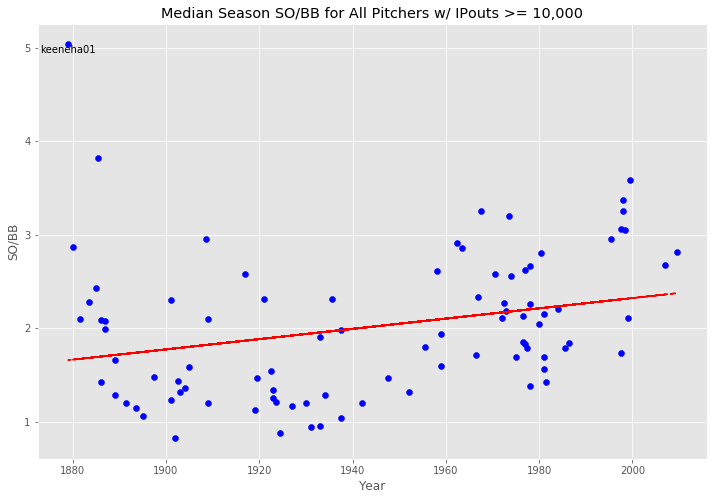

In [35]:
plt.figure(figsize = (12,8))

x = career_pitching.loc[career_pitching["IPouts"] >= 10_000, "midYear"]
y = career_pitching.loc[career_pitching["IPouts"] >= 10_000, "SO/BB"]

plt.scatter(x, y, c = "blue")

z = np.polyfit(x,y,1)
p = np.poly1d(z)
plt.plot(x, p(x), "r--")

plt.title("Median Season SO/BB for All Pitchers w/ IPouts >= 10,000")
plt.xlabel("Year")
plt.ylabel("SO/BB")

outlier = career_pitching.loc[(career_pitching["SO/BB"] > 5) & (career_pitching["IPouts"] >= 10_000), ["playerID", "midYear", "SO/BB"]].reset_index()
plt.annotate(outlier["playerID"][0],
             (outlier["midYear"][0], outlier["SO/BB"][0]),
             ha = "center",
             va = "top");

- For all pitchers with at least 10,000 outs pitched, their SO/BB have slowly increased over time